# **Delta-X Applications Workshop**



Get familiar with Jupyter Notebook using the toolbox at the top. 

First we must import packages


In [ ]:
!pip install rasterio

import numpy as np
from osgeo import gdal
import pandas as pd
import rasterio
import matplotlib.pyplot as plt

import os

#For access to Google Drive files
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#For saving to Google Drive
from google.colab import drive

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
Gdrive = GoogleDrive(gauth)

drive.mount('/content/drive',force_remount=True)


     |████████████████████████████████| 19.3 MB 8.1 MB/s 
Mounted at /content/drive


Before you can run the next step, you need to link the shared DeltaX_Workshop Google Drive Folder to your "My Drive".

> This is done by going to https://drive.google.com/drive/folders/1KQIQPNowinFYQGd7SvpUE2sHPS0ALueV?usp=sharing

> And then adding a shortcut to your drive



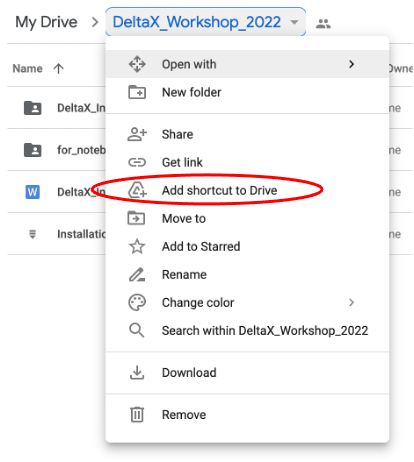

In [16]:
input_dir = '/content/drive/MyDrive/DeltaX_Workshop_2022/for_notebooks/'


Load a file

In [17]:
data = rasterio.open(input_dir + 'Test_Raster.tif')
# Normalize bands into 0.0 - 1.0 scale
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

# Convert to numpy arrays
red = data.read(1)
green = data.read(2)
blue = data.read(3)

# Normalize band DN
red_norm = normalize(red)
green_norm = normalize(green)
blue_norm = normalize(blue)

# Stack bands
rbg = np.dstack((red_norm, green_norm,blue_norm))

# View the color composite
plt.imshow(rbg)
plt.savefig(f"{input_dir}/plot1.png")

RasterioIOError: ignored